# Import the libraries

In [94]:
import os
import sys
sys.path.append("../")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Objetive: Predict Sex with the other variables

### Load the Sample Data and scale with StandardScaler

In [118]:
data = pd.read_csv('../data/processed/data_sample.csv')

### Split the data into train and test

In [119]:
data['sex'].value_counts()

sex
1    51706
0    46203
Name: count, dtype: int64

In [120]:
from scripts.manipulation.undersampling import undersample

data_balanced = undersample(data, target='sex')

In [121]:
data_balanced.columns

Index(['sex', 'age', 'waistline', 'systolic_blood_pressure',
       'diastolic_blood_pressure', 'glucose_fasting', 'HDL', 'triglyceride',
       'hemoglobin', 'urine_protein', 'serum_creatinine', 'AST', 'ALT', 'GGT',
       'smoker_status', 'drinker', 'NO_HDL', 'AST_ALT', 'BMI', 'hypertension',
       'diabetes'],
      dtype='object')

In [122]:
X = data_balanced.drop(['sex'], axis=1)
y= data_balanced['sex']

In [123]:
data_balanced['sex'].value_counts()

sex
1    46203
0    46203
Name: count, dtype: int64

### Train Random Forest Classifier and XGBoost Classifier with Sample Data

In [124]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

### Split data into train and test

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Random Forest Classifier

In [126]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred_rf)
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
TN = cm[0, 0]
print('Accuracy score RF: ', accuracy_score(y_test, y_pred_rf))
print(f'AUC-ROC score RF: {roc_auc_score(y_test, y_pred_prob_rf)}')
print('Classification report RF: \n', classification_report(y_test, y_pred_rf))
print(f'True Positives (TP): {TP}')
print(f'False Negatives (FN): {FN}')
print(f'False Positives (FP): {FP}')
print(f'True Negatives (TN): {TN}')


Accuracy score RF:  0.9424283962196089
AUC-ROC score RF: 0.9864392031265902
Classification report RF: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     13904
           1       0.95      0.94      0.94     13818

    accuracy                           0.94     27722
   macro avg       0.94      0.94      0.94     27722
weighted avg       0.94      0.94      0.94     27722

True Positives (TP): 12945
False Negatives (FN): 873
False Positives (FP): 723
True Negatives (TN): 13181


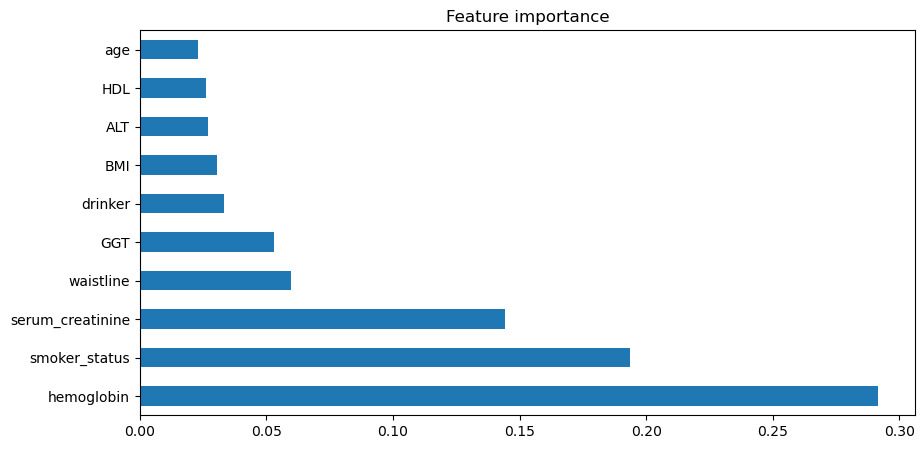

In [127]:
# plot feature importance
plt.figure(figsize=(10,5))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature importance')
plt.show()


#### XGBoost Classifier

In [128]:
from xgboost import plot_importance

In [129]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred_xgb)
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
TN = cm[0, 0]

print('Accuracy score XGB: ', accuracy_score(y_test, y_pred_xgb))
print(f'AUC-ROC score XGB: {roc_auc_score(y_test, y_pred_prob_xgb)}')
print('Classification report XGB: \n', classification_report(y_test, y_pred_xgb))
print(f'True Positives (TP): {TP}')
print(f'False Negatives (FN): {FN}')
print(f'False Positives (FP): {FP}')
print(f'True Negatives (TN): {TN}')

Accuracy score XGB:  0.9645047254887815
AUC-ROC score XGB: 0.9941692426915678
Classification report XGB: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     13904
           1       0.97      0.96      0.96     13818

    accuracy                           0.96     27722
   macro avg       0.96      0.96      0.96     27722
weighted avg       0.96      0.96      0.96     27722

True Positives (TP): 13302
False Negatives (FN): 516
False Positives (FP): 468
True Negatives (TN): 13436


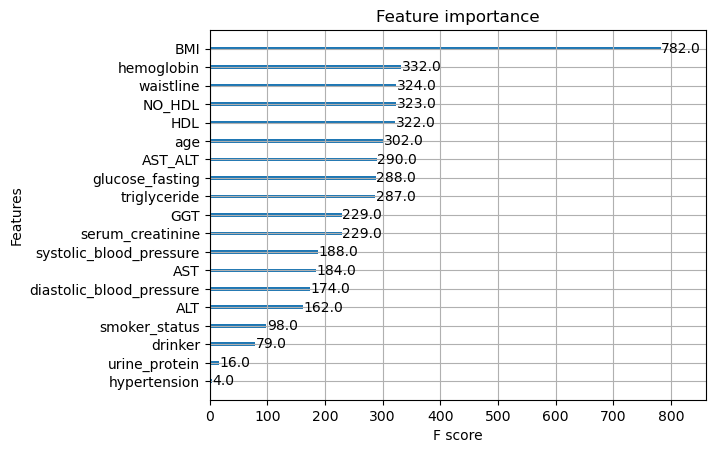

In [130]:
plot_importance(xgb)
plt.show()

## Testing the complete data with the trained models

In [131]:
# Load data

data_2 = pd.read_csv('../data/processed/clean.csv')
X_2 = data_2.drop(['sex'], axis=1)
y_2= data_2['sex']

In [132]:
# Random Forest model trained with all data
y_pred_data_rf_2 = rf.predict(X_2)
y_pred_prob_rf_2 = rf.predict_proba(X_2)[:,1]
print('Accuracy score RF-2: ', accuracy_score(y_2, y_pred_data_rf_2))
print(f'AUC-ROC score RF-2: {roc_auc_score(y_2, y_pred_prob_rf_2)}')
print('Confusion matrix RF-2: ', confusion_matrix(y_2, y_pred_data_rf_2))
print('Classification report RF-2: \n', classification_report(y_2, y_pred_data_rf_2))

Accuracy score RF-2:  0.9483560738604968
AUC-ROC score RF-2: 0.9882504223048703
Confusion matrix RF-2:  [[441762  21264]
 [ 29300 486763]]
Classification report RF-2: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95    463026
           1       0.96      0.94      0.95    516063

    accuracy                           0.95    979089
   macro avg       0.95      0.95      0.95    979089
weighted avg       0.95      0.95      0.95    979089



In [133]:
# XGBoost model trained with all data
y_pred_xgb_2 = xgb.predict(X_2)
y_pred_prob_xgb_2 = xgb.predict_proba(X_2)[:,1]
print('Accuracy score XGB-2: ', accuracy_score(y_2, y_pred_xgb_2))
print(f'AUC-ROC score XGB-2: {roc_auc_score(y_2, y_pred_prob_xgb_2)}')
print('Confusion matrix XGB-2: ', confusion_matrix(y_2, y_pred_xgb_2))
print('Classification report XGB-2: \n', classification_report(y_2, y_pred_xgb_2))

Accuracy score XGB-2:  0.9666649303587315
AUC-ROC score XGB-2: 0.9948542807477483
Confusion matrix XGB-2:  [[448578  14448]
 [ 18190 497873]]
Classification report XGB-2: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96    463026
           1       0.97      0.96      0.97    516063

    accuracy                           0.97    979089
   macro avg       0.97      0.97      0.97    979089
weighted avg       0.97      0.97      0.97    979089

